In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [2]:
df = pd.read_csv("../data/final/EV_ICE_FEATURE_ENGINEERED.csv")
df.head()


,State,City,Vehicle Class,Powertrain,Energy Charge (₹/kWh),Petrol,Diesel,Cost_per_km_₹,CO2_per_km_kg,Maintenance Cost (₹/km),Replacement Cost (₹),Replacement Cycle (Years),Charging Stations Count,Cost_Advantage_₹_per_km,CO2_Advantage_kg_per_km,Charging_Density,Charging_Readiness
0,Maharashtra,Mumbai,2W,EV,8.27,104.21,90.03,0.330800,0.028640,0.2,40000,5,0.0,1.838044,0.022693,0.0,Low
1,Maharashtra,Mumbai,2W,EV,12.63,104.21,90.03,0.505200,0.028640,0.2,40000,5,0.0,1.838044,0.022693,0.0,Low
2,Maharashtra,Mumbai,2W,EV,14.93,104.21,90.03,0.597200,0.028640,0.2,40000,5,0.0,1.838044,0.022693,0.0,Low
3,Maharashtra,Mumbai,2W,ICE,8.27,104.21,90.03,2.315778,0.051333,1.2,15000,7,0.0,1.838044,0.022693,0.0,Low
4,Maharashtra,Mumbai,2W,ICE,12.63,104.21,90.03,2.315778,0.051333,1.2,15000,7,0.0,1.838044,0.022693,0.0,Low


In [3]:
print("Shape:", df.shape)
df.info()


Shape: (486, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      486 non-null    object 
 1   City                       486 non-null    object 
 2   Vehicle Class              486 non-null    object 
 3   Powertrain                 486 non-null    object 
 4   Energy Charge (₹/kWh)      486 non-null    float64
 5   Petrol                     18 non-null     float64
 6   Diesel                     18 non-null     float64
 7   Cost_per_km_₹              486 non-null    float64
 8   CO2_per_km_kg              486 non-null    float64
 9   Maintenance Cost (₹/km)    486 non-null    float64
 10  Replacement Cost (₹)       486 non-null    int64  
 11  Replacement Cycle (Years)  486 non-null    int64  
 12  Charging Stations Count    486 non-null    float64
 13  Cost_Advantage_₹_per_km    486 no

In [4]:
df.isna().sum().sort_values(ascending=False)


Diesel                       468
Petrol                       468
State                          0
City                           0
Vehicle Class                  0
Energy Charge (₹/kWh)          0
Powertrain                     0
Cost_per_km_₹                  0
CO2_per_km_kg                  0
Maintenance Cost (₹/km)        0
Replacement Cost (₹)           0
Replacement Cycle (Years)      0
Charging Stations Count        0
Cost_Advantage_₹_per_km        0
CO2_Advantage_kg_per_km        0
Charging_Density               0
Charging_Readiness             0
dtype: int64

In [6]:
df["Powertrain"].value_counts()


Powertrain
EV     243
ICE    243
Name: count, dtype: int64

In [9]:
df["Vehicle Class"].value_counts()


Vehicle Class
2W    162
3W    162
4W    162
Name: count, dtype: int64

In [ ]:
df["State"].nunique()



3

In [14]:
df["City"].nunique()

3

In [16]:
cost_cols = [
    "Cost_per_km_₹",
    "Maintenance Cost (₹/km)",
    "Replacement Cost (₹)"
]

df[cost_cols].describe()


,Cost_per_km_₹,Maintenance Cost (₹/km),Replacement Cost (₹)
count,486.000000,486.000000,486.000000
mean,8.593456,1.300000,115833.333333
std,20.183660,1.123654,133785.776601
min,0.040000,0.200000,15000.000000
25%,1.202100,0.300000,25000.000000
50%,3.001000,1.000000,57500.000000
75%,4.501500,1.800000,140000.000000
max,149.400000,3.500000,400000.000000


In [17]:
emission_cols = ["Cost_per_km_₹"]
df[emission_cols].describe()


,Cost_per_km_₹
count,486.000000
mean,8.593456
std,20.183660
min,0.040000
25%,1.202100
50%,3.001000
75%,4.501500
max,149.400000


c:\Users\Admin\OneDrive\Desktop\EV_PROJECT\.env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


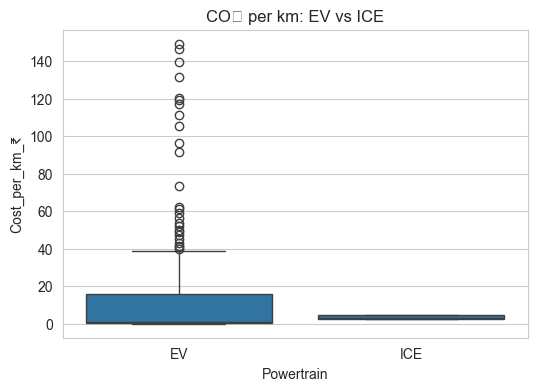

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Powertrain", y="Cost_per_km_₹")
plt.title("CO₂ per km: EV vs ICE")
plt.show()
